# Projet Machine Learning en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

<h1 style="color:red">Introduction</h1>

Pour ce projet, deux notebooks similaires ont été rédigés : un en R et l’autre en Python. Le notebook rédigé en R contient l'entièreté de nos analyses. 
Celui en Python contient le code ainsi que des analyses minimales.

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.


In [39]:
# Chargement des librairies nécessaires
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import auc  
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
random.seed(1)

<h1 style="color:red">I- Statistiques descriptives et exploration des variables</h1>


### 1) Prise en charge des données

In [2]:
# Lecture des données
path = ""
gym = pd.read_csv("gym_members_exercise_tracking.csv")

# Affichage des premières lignes
print("Aperçu des premières lignes du jeu de données:")
display(gym.head())  

# Résumé statistique
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  

Aperçu des premières lignes du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39



Résumé statistique du jeu de données:


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


In [3]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']


In [4]:
# Nettoyage des noms de colonnes 
gym.columns = (
    gym.columns
    .str.replace(r"\s*\(.*?\)", "", regex=True)  
    .str.replace(" ", "_")                    
)


In [5]:
print(gym.columns.tolist())

['Age', 'Gender', 'Weight', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake', 'Workout_Frequency', 'Experience_Level', 'BMI']


In [6]:
# Conversion des colonnes en types catégoriels
categorical_columns = [
    "Gender",
    "Workout_Type",
    "Experience_Level",
    "Workout_Frequency"
]

for col in categorical_columns:
    gym[col] = gym[col].astype("category")


### 2) Exploration par une analyse descriptive unidimensionnelle des données

Conformément aux analyses faites sur le fichier R, nous transformons les variables Weight et BMI.

In [7]:
# Application du logarithme sur les colonnes 'Weight..kg.' et 'BMI'
gym["LWeight"] = np.log(gym["Weight"])
gym["LBMI"] = np.log(gym["BMI"])

# Supprimer les colonnes originales
gym.drop(columns=["Weight", "BMI"], inplace=True)

In [8]:
print("\nRésumé statistique du jeu de données:")
display(gym.describe(include='all'))  


Résumé statistique du jeu de données:


,Age,Gender,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,LWeight,LBMI
count,973.000000,973,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.0,973.0,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4.0,3.0,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,3.0,2.0,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,368.0,406.0,NaN,NaN
mean,38.683453,NaN,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,NaN,NaN,4.262981,3.180764
std,12.180928,NaN,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,NaN,NaN,0.277751,0.263097
min,18.000000,NaN,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,NaN,NaN,3.688879,2.511224
25%,28.000000,NaN,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,NaN,NaN,4.062166,3.001217
50%,40.000000,NaN,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,NaN,NaN,4.248495,3.184698
75%,49.000000,NaN,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,NaN,NaN,4.454347,3.352007


<h1 style="color:red">II- Prédiction des Calories Brulées</h1>


Nous considérons maintenant le problème de la prédiction de la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test. 


In [9]:
#Variables qualitatives
qual_vars = gym.select_dtypes(include="category").columns.tolist()
gymDum = pd.get_dummies(gym[qual_vars], drop_first=True)
print(qual_vars)


['Gender', 'Workout_Type', 'Workout_Frequency', 'Experience_Level']


In [10]:
gymQuant=gym[['Age', 'Height', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration',  'Fat_Percentage', 'Water_Intake',  'LWeight', 'LBMI']]
dfC=pd.concat([gymDum,gymQuant],axis=1)
dfC.head()

# variable à expliquer réelle
Yr=gym["Calories_Burned"]

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Yr_train, Yr_test = train_test_split(dfC, Yr, test_size=0.2, random_state=235)

Normalisation des données

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


### 2.2.1 Modèle linéaire sans selection de variables 

In [28]:
regLinear = linear_model.LinearRegression()
regLinear.fit(Xr_train,Yr_train)

LinearRegression()

In [29]:
# Résultats de prédiction sur l'échantillon de test
prev_linear=regLinear.predict(Xr_test)
mse_mod_lin=mean_squared_error(prev_linear,Yr_test)
r2_mod_lin=r2_score(Yr_test,prev_linear)
print("MSE=", mse_mod_lin)
print("Q2=",r2_mod_lin)

MSE= 1487.3525561753904
Q2= 0.9805453008279581


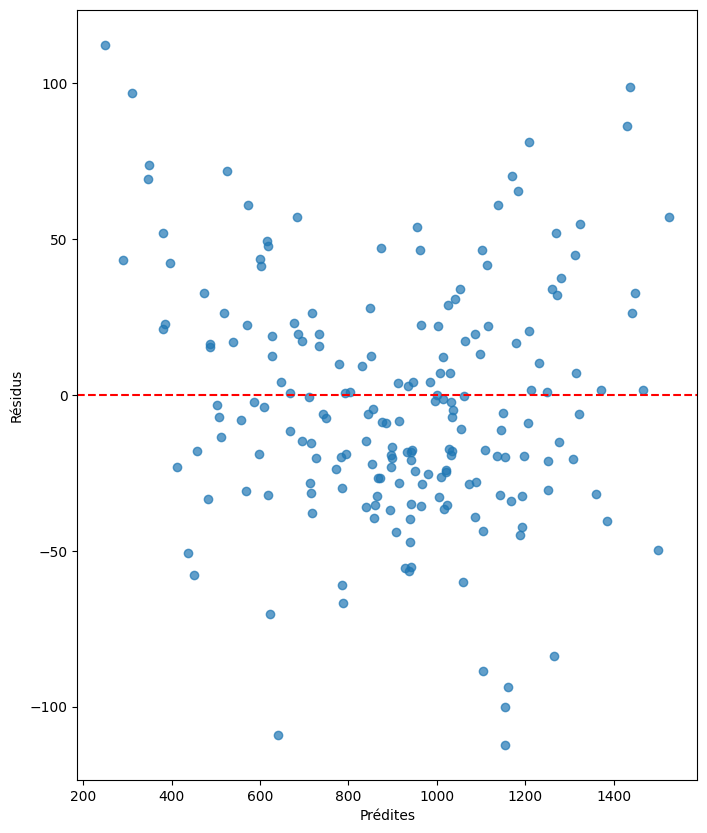

In [41]:
# Résidus sur l'échantillon de test
plt.plot(prev_linear,Yr_test-prev_linear,"o",alpha=0.7)
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Coefficients du modèle linéaire')

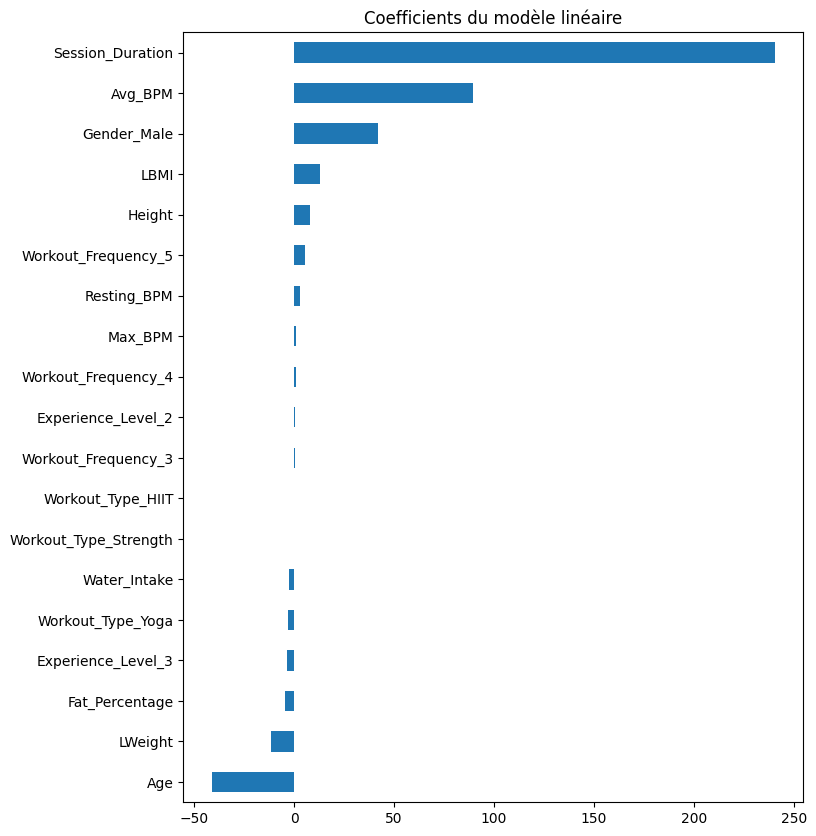

In [31]:
#Importance des paramètres

model_linear=regLinear.fit(Xr_train,Yr_train)
coef = pd.Series(model_linear.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle linéaire")

### 2.2.2 Pénalisation par régularisation L2 (Ridge)

In [27]:
regRidge = linear_model.Ridge()
regRidge.fit(Xr_train,Yr_train)

Ridge()

In [23]:
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.5,0.8,1,3,4.52]}]
regRidge = GridSearchCV(linear_model.Ridge(), param,cv=10,n_jobs=-1)
regRidgeOpt=regRidge.fit(Xr_train, Yr_train)

# paramètre optimal
regRidgeOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regRidgeOpt.best_score_,regRidgeOpt.best_params_))

Meilleur R2 = 0.977560, Meilleur paramètre = {'alpha': 0.8}


In [24]:
# Résultats de prédiction sur l'échantillon de test
prev_ridge=regRidgeOpt.predict(Xr_test)
mse_mod_lin_ridge=mean_squared_error(prev_ridge,Yr_test)
r2_mod_lin_ridge=r2_score(Yr_test,prev_ridge)
print("MSE=", mse_mod_lin_ridge)
print("Q2=",r2_mod_lin_ridge)

MSE= 1488.8294949154597
Q2= 0.9805259823423951


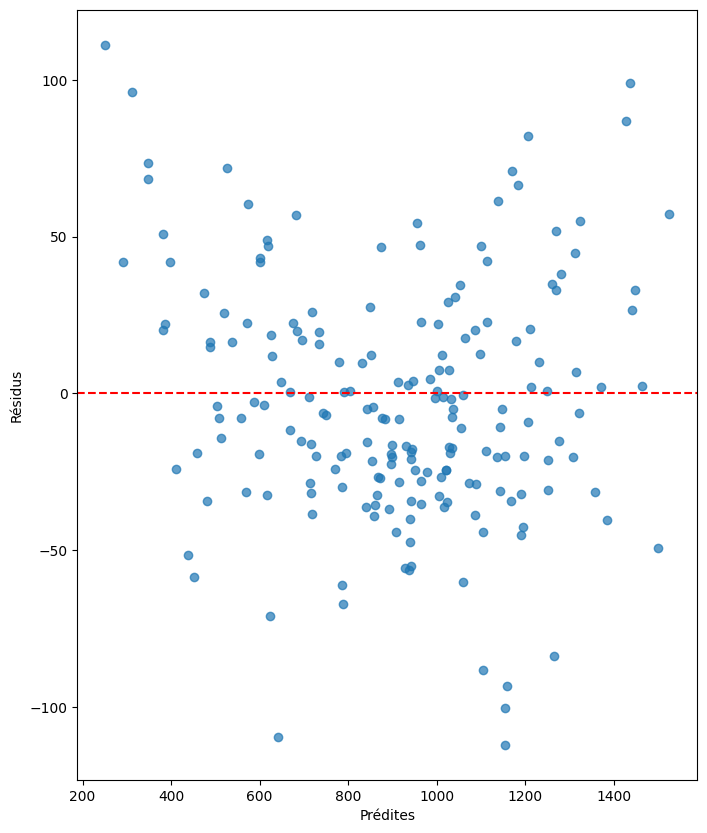

In [42]:
# Résidus sur l'échantillon de test
plt.plot(prev_ridge,Yr_test-prev_ridge,"o",alpha=0.7)
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Coefficients du modèle Ridge')

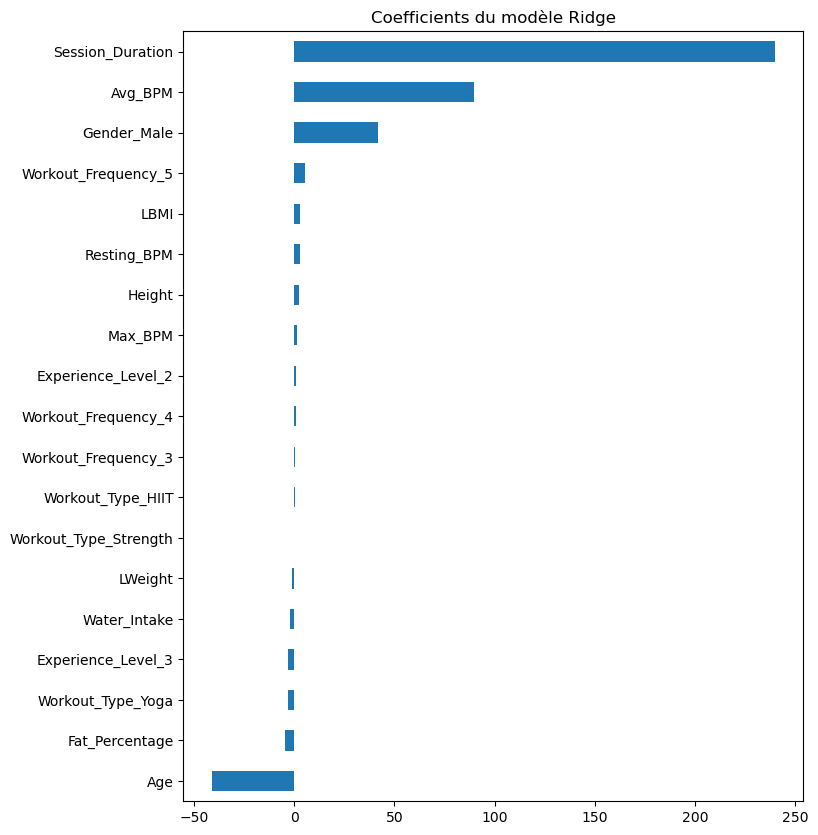

In [30]:
#Importance des paramètres

regRidge=linear_model.Ridge(alpha=regRidgeOpt.best_params_['alpha'])
model_ridge=regRidge.fit(Xr_train,Yr_train)
model_ridge.coef_
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle Ridge")

### 2.2.3 Sélection de variable par régularisation L1 (LASSO)

In [19]:
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)

Lasso()

Le paramètre de pénalisation Lasso est optimisé par validation croisée ci dessous.

In [20]:
# Grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.5,0.8,1,3,4.52]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=10,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)

# Paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.977778, Meilleur paramètre = {'alpha': 0.8}


In [18]:
# Coefficients gardés par Lasso
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 11 variables et en supprime 8


In [21]:
# Résultats de prédiction sur l'échantillon de test
prev_lasso=regLassOpt.predict(Xr_test)
mse_mod_lin_lasso=mean_squared_error(prev_lasso,Yr_test)
r2_mod_lin_lasso=r2_score(Yr_test,prev_lasso)
print("MSE=", mse_mod_lin_lasso)
print("Q2=",r2_mod_lin_lasso)

MSE= 1444.7094284373109
Q2= 0.9811030766010623


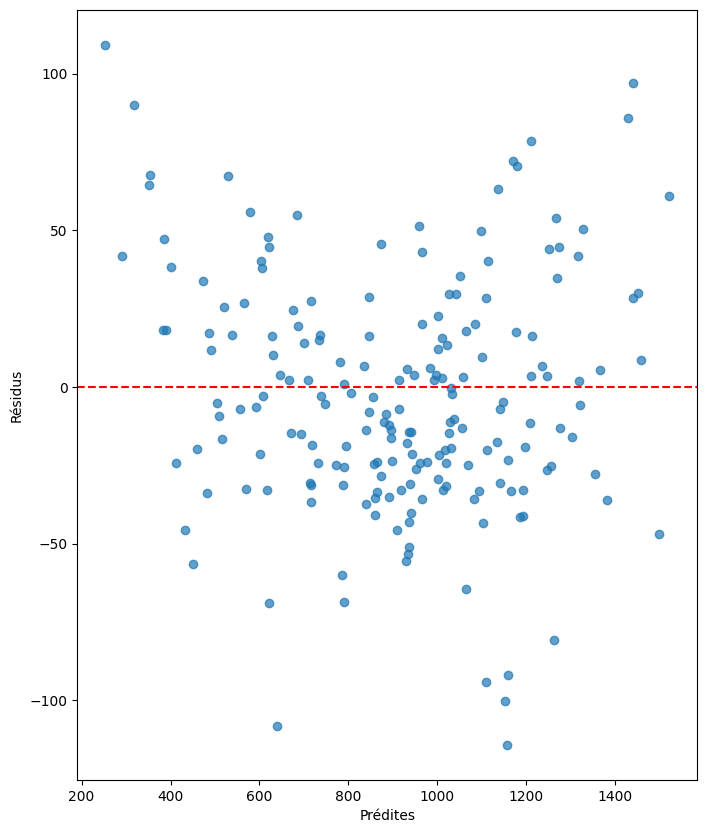

In [43]:
# Résidus sur l'échantillon de test
plt.plot(prev_lasso,Yr_test-prev_lasso,"o",alpha=0.7)
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

Text(0.5, 1.0, 'Coefficients du modèle lasso')

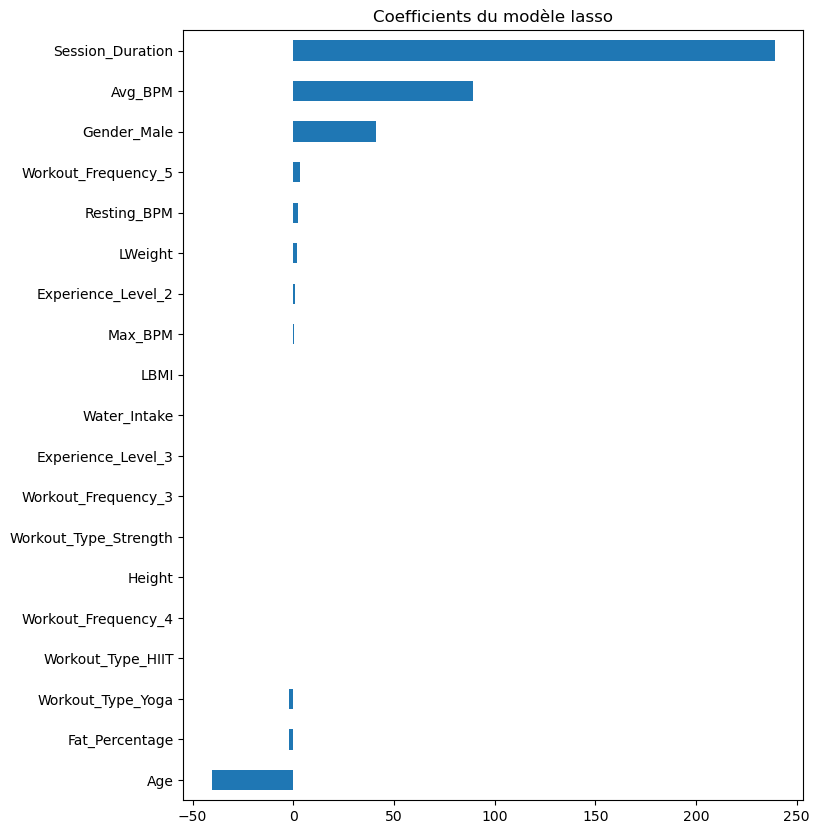

In [24]:
#Importance des paramètres
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients du modèle lasso")

On remarque que les modèles LASSO et RIDGE donnent la même importance aux variables. Les variables importantes sont la durée de la session, l'average_BPM et le genre.

## 2.3 Support Vector Regression(SVR)


Nous nous interressons seulement au noyau gaussien car c'est le plus performant selon notre analyse sur R. Nous estimons les paramètres optimaux par validation croisée.

In [34]:
# Définition du modèle SVR et des hyperparamètres à tester
svr = SVR()
param_grid = {
    'C': [3.5,5, 8, 12, 20,50, 100, 120],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid Search avec validation croisée
grid_search = GridSearchCV(svr, param_grid, cv=10)
grid_search.fit(Xr_train, Yr_train)

# Meilleur modèle
best_svr = grid_search.best_estimator_
print("Meilleurs paramètres trouvés :", grid_search.best_params_)

Meilleurs paramètres trouvés : {'C': 120, 'gamma': 0.01}


Text(0, 0.5, 'Résidus')

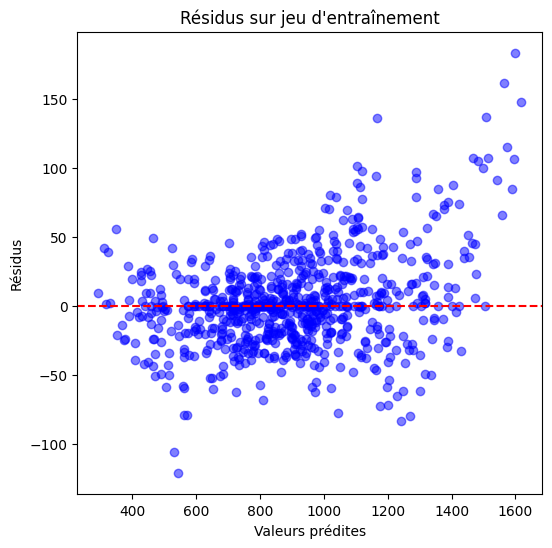

In [35]:
# Prédiction sur les jeux de données
Yr_train_pred = best_svr.predict(Xr_train)

# Calcul des résidus
residus_train = Yr_train - Yr_train_pred

# Tracé des résidus
plt.figure(figsize=(6, 6))
plt.scatter(Yr_train_pred, residus_train, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu d'entraînement")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

#### Prévision sur l'échantillon de test

In [36]:
# Résultats de prédiction sur l'échantillon de test
Yr_test_pred = best_svr.predict(Xr_test)


mse_svr=mean_squared_error(Yr_test_pred,Yr_test)
q2_svr=r2_score(Yr_test,Yr_test_pred)
print("MSE=", mse_svr)
print("Q2=",q2_svr)

MSE= 1321.5684050933323
Q2= 0.9827137717620367


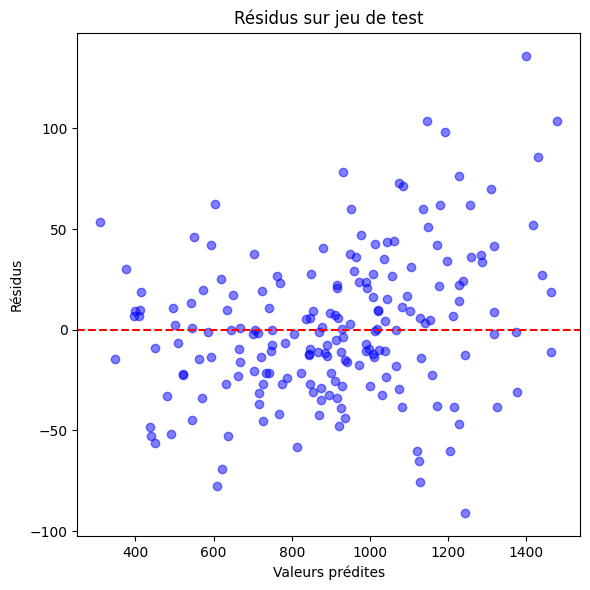

In [39]:
# Tracé des résidus sur l'échantillon de test

residus_test = Yr_test - Yr_test_pred

plt.figure(figsize=(6, 6))
plt.scatter(Yr_test_pred, residus_test, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

plt.tight_layout()
plt.show()

## 2.4 Arbre Optimal

In [45]:
# Optimisation de la profondeur de l'arbre dans le cas d'une régression
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yr_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % ( treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.924189, Meilleur paramètre = {'max_depth': 8}


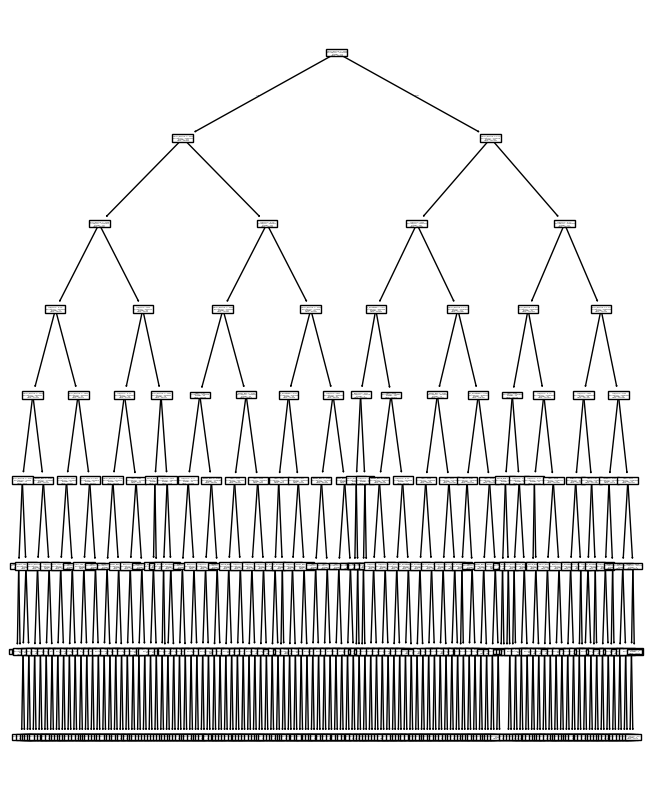

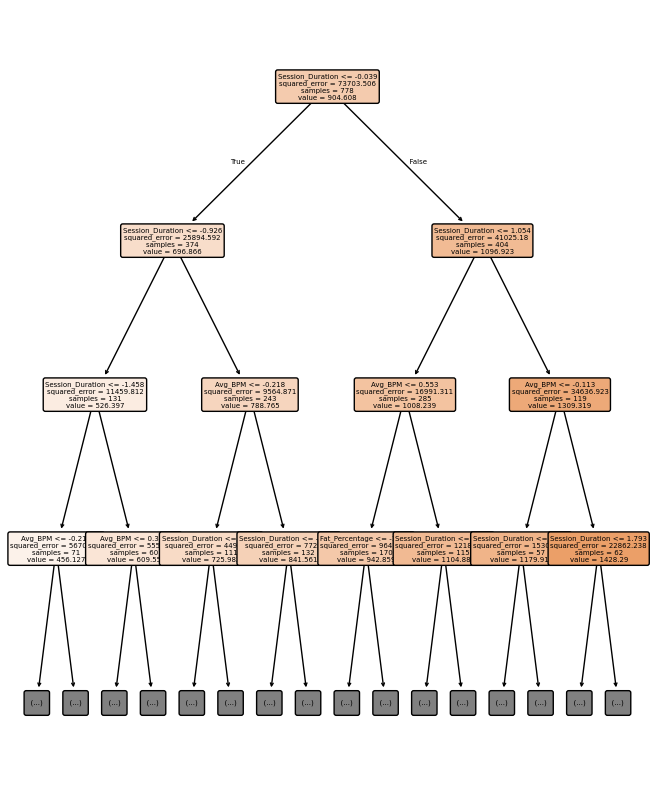

In [49]:
# Arbre optimisé
tree_opt = DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
tree_opt.fit(Xr_train, Yr_train)

# Affichage de l'arbre optimisé
from sklearn.tree import plot_tree
plot_tree(tree_opt,feature_names=dfC.columns.tolist());
plt.show()

# Affichage des quatre premiers niveaux de l'arbre pour plus de lisibilité

plot_tree(
    tree_opt,
    feature_names=dfC.columns.tolist(),
    max_depth=3,        
    filled=True,        
    rounded=True,
    fontsize=5
)

plt.show()

In [89]:
#MSE sur l'échantillon test
mse_test_cart = mean_squared_error(Yr_test, y_pred_test)
print("MSE sur l'échantillon test :", mse_test_cart)
#Q2 sur l'échantillon test
q2_cart=r2_score(Yr_test,y_pred_test)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 4357.970065738833
Q2 : 0.9429973772676161


Text(0, 0.5, 'Résidus')

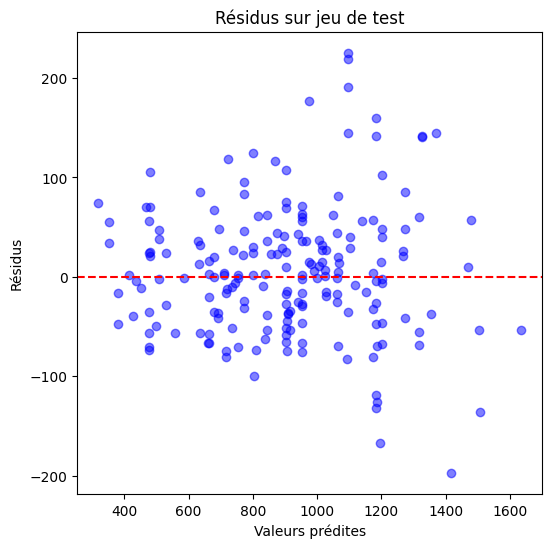

In [52]:
# Prédiction sur l'échantillon de test et graphe des résidus
y_pred_test = tree_opt.predict(Xr_test)
res_cart = Yr_test - y_pred_test

# Résidus sur l'échantillon de test
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_test, res_cart, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

## 2.5 Forêt Aléatoire

Cherchons le paramètre optimal par validation croisée.

In [55]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % ( rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.963057, Meilleur paramètre = {'max_features': 9}


In [56]:
# prévision sur l'échantillon test
y_pred_test_rf = rfOpt.predict(Xr_test)

Text(0, 0.5, 'Résidus')

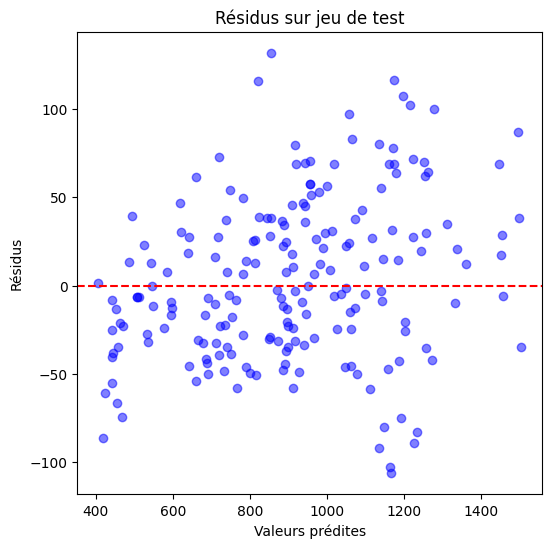

In [57]:
#résidus sur l'échantillon test
res_rf = Yr_test - y_pred_test_rf

# Tracé des résidus sur l'échantillon de test
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_test_rf, res_rf, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

In [87]:
#MSE échantillon test
mse_test_rf = mean_squared_error(Yr_test, y_pred_test_rf)
print("MSE sur l'échantillon test :", mse_test_rf)

#Q2 échantillon test
q2_cart=r2_score(Yr_test,y_pred_test_rf)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 2143.8822282051287
Q2 : 0.9719578363335267


## 2.6 Boosting

In [61]:
boost_reg = GradientBoostingRegressor(
    learning_rate=0.03,      
    min_samples_leaf=5,      
    max_depth=3,             
    loss='squared_error',    
    verbose=0
)

In [75]:
param_grid = {
    'n_estimators': list(range(100, 801, 100)) 
}

grid = GridSearchCV(boost_reg, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(Xr_train, Yr_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(learning_rate=0.03,
                                                 min_samples_leaf=5,
                                                 n_estimators=800),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800]},
             scoring='neg_mean_squared_error')

/tmp/ipykernel_2143/707978594.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


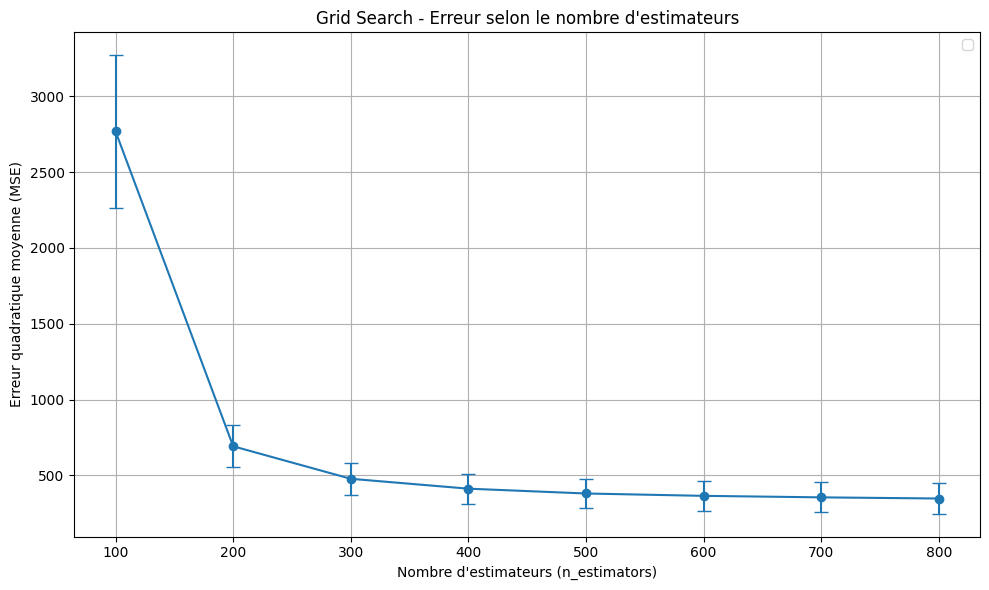

In [63]:
# On trace l'erreur en fonction du nombre d'itérations d'AdaBoost

results = grid.cv_results_
n_estimators = results['param_n_estimators'].data 
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

# Convertir les scores négatifs en MSE positifs
mean_mse = -mean_scores
std_mse = std_scores

# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.errorbar(n_estimators, mean_mse, yerr=std_mse, fmt='-o', capsize=5)
plt.xlabel("Nombre d'estimateurs (n_estimators)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Grid Search - Erreur selon le nombre d'estimateurs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
# On garde le meilleur modèle (celui avec 800 arbres)

boost_reg = grid.best_estimator_

Text(0, 0.5, 'Résidus')

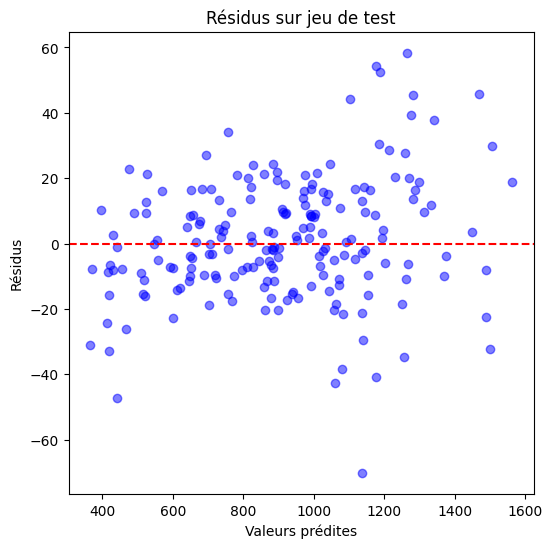

In [79]:
# Résidus sur l'échantillon de test

y_pred_test_gb = boost_reg.predict(Xr_test)
res_gb = Yr_test - y_pred_test_gb

# Tracé des résidus sur l'échantillon de test
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_test_gb, res_gb, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

In [78]:
mse_test_gb = mean_squared_error(Yr_test, y_pred_test_gb)
print("MSE sur l'échantillon test :", mse_test_gb)
q2_cart=r2_score(Yr_test,y_pred_test_gb)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 349.26768792617696
Q2 : 0.995431548646011


Le boosting a de très bonnes performances. L'erreur de prévision est encore meilleure que celle des modèles linéaires. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

In [82]:
nnet_reg = MLPRegressor(   
    max_iter=10000,           
)   

param_grid = {
    'hidden_layer_sizes': [(5,),(6,),(7,),(8,)],
    'alpha': [1, 2, 3]
}

grid = GridSearchCV(nnet_reg, param_grid, cv=5, n_jobs=-1)
grid.fit(Xr_train, Yr_train)

/home/senatorequentin/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/senatorequentin/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/senatorequentin/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/senatorequentin/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  war

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [1, 2, 3],
                         'hidden_layer_sizes': [(5,), (6,), (7,), (8,)]})

In [83]:
best_model = grid.best_estimator_
best_params = grid.best_params_

print("Meilleurs paramètres : %s" % (best_params))
print("Score R^2 sur training :", best_model.score(Xr_train, Yr_train))

Meilleurs paramètres : {'alpha': 1, 'hidden_layer_sizes': (5,)}
Score R^2 sur training : 0.9882317438797505


Text(0, 0.5, 'Résidus')

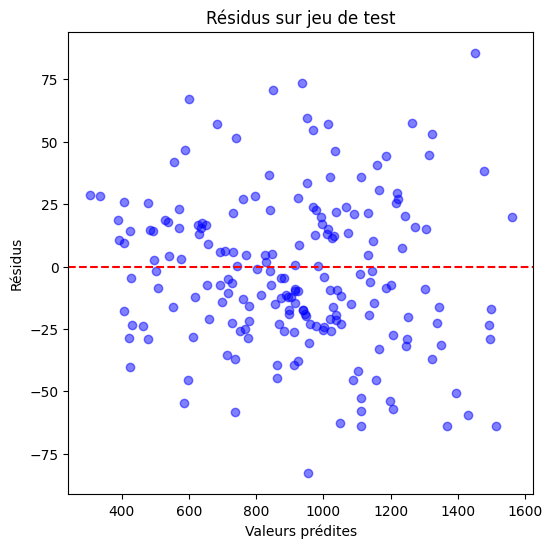

In [84]:
# Résidus sur l'échantillon de test

y_pred_test_rn = best_model.predict(Xr_test)
res_rn = Yr_test - y_pred_test_rn

# Tracé des résidus sur l'échantillon de test
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_test_rn, res_rn, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Résidus sur jeu de test")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

In [85]:
# Calcul des résidus sur l'échantillon de test

mse_test_rn = mean_squared_error(Yr_test, y_pred_test_rn)
print("MSE sur l'échantillon test :", mse_test_rn)
q2_cart=r2_score(Yr_test,y_pred_test_rn)
print("Q2 :",q2_cart)

MSE sur l'échantillon test : 918.853408944615
Q2 : 0.9879813184977545


La MSE du réseaux de neurones est meilleure que celle des modèles linéaires. Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus, nous observons une certaine variabilité des résultats due à l'initialisation aléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [92]:
print("RMSE RdN :",np.sqrt(mse_test_rn),"\n")
print("RMSE Boosting :",np.sqrt(mse_test_gb),"\n")
print("RMSE Foret aléatoire :" ,np.sqrt(mse_test_rf),"\n")
print("RMSE Arbre optimal :",np.sqrt(mse_test_cart) ,"\n")
print("RMSE pour un SVR avec noyau radial :",np.sqrt(mse_svr) , "\n")
print("RMSE Modèle linéaire Ridge :", np.sqrt(mse_mod_lin_ridge), "\n")
print("RMSE Modèle linéaire Lasso :", np.sqrt(mse_mod_lin_lasso), "\n")
print("RMSE modèle linéaire sans sélection de variable :", np.sqrt(mse_mod_lin), "\n")

RMSE RdN : 30.31259488965956 

RMSE Boosting : 18.688704822062363 

RMSE Foret aléatoire : 46.30207585200829 

RMSE Arbre optimal : 66.01492305334327 

RMSE pour un SVR avec noyau radial : 36.35338230609818 

RMSE Modèle linéaire Ridge : 38.585353372950465 

RMSE Modèle linéaire Lasso : 38.0093334384768 

RMSE modèle linéaire sans sélection de variable : 38.5662100312617 



Le gradient boosting est le modèle le plus performant avec une RMSE égale à 18,6. Ainsi, lors de la prédiction du nombre de calories brûlées, il est suivi par le modèle de Réseau de neurones avec une RMSE égale à 30,3.

Or, Boosting et Réseau de neurones ont un niveau d'interprétabilité très faible.

Donc si on rajoute une contrainte d'interprétabilité, les modèles linéaires sont les plus pertinents. Le modèle avec sélection de variables LASSO avec lambda.min semble être le meilleur compromis avec une RMSE égale à 38,6.

A noter qu'en Python on ne peut pas implémenter la régression par modèle quadratique, donc on n'a pas pu comparer avec cette méthode qui a de très bons résultats en R.

##### Retour sur l'analyse de données

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles linéaires avec sélection de variable et l'arbre optimal ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Nous avons également retrouvé l'importance du genre dans la sélection des variables des modèles linéaires. Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.

*Remarque : nous constatons que les valeurs de RMSE varient entre nos codes Python et R. En effet, les fonctions générant les modèles ainsi que celles pour rechercher les hyper paramètres optimaux ne sont pas les mêmes.  De plus, certains modèles présentent une forte variabilité et les échantillons  de test et d'apprentissage ne sont pas les mêmes. Toutefois, nous retrouvons bien, de manière générale, les mêmes classements entre les modèles.*


<h1 style="color:red">III- Prédiction du niveau d'expérience</h1>


Fonctions utiles pour l'affichage des courbes ROC.

In [13]:
def compute_roc_points(y_true_bin, y_scores):
    """
    Calcule manuellement les points de la courbe ROC pour une classe.
    """
    thresholds = np.sort(np.unique(y_scores))[::-1]
    tpr_list = []
    fpr_list = []

    P = sum(y_true_bin)
    N = len(y_true_bin) - P

    for thresh in thresholds:
        preds = (y_scores >= thresh).astype(int)
        TP = np.sum((preds == 1) & (y_true_bin == 1))
        FP = np.sum((preds == 1) & (y_true_bin == 0))
        TPR = TP / P if P != 0 else 0
        FPR = FP / N if N != 0 else 0
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    return np.array(fpr_list), np.array(tpr_list)

def plot_multiclass_roc_manual(y_true, y_proba, class_names=None, title="Courbes ROC Multiclasse (manuel)"):
    """
    Affiche les courbes ROC multiclasse avec AUC dans la légende.
    """
    classes = np.unique(y_true)
    n_classes = len(classes)

    if class_names is None:
        class_names = [str(c) for c in classes]

    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', n_classes)

    for idx, cls in enumerate(classes):
        y_true_bin = (y_true == cls).astype(int)
        y_scores = y_proba[:, idx]

        fpr, tpr = compute_roc_points(y_true_bin, y_scores)
        auc_value = auc(fpr, tpr)  # Calcul AUC ici

        plt.plot(fpr, tpr, label=f"Classe {class_names[idx]} (AUC = {auc_value:.2f})", color=colors(idx), lw=2)

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel("Faux positifs (1 - Spécificité)")
    plt.ylabel("Vrais positifs (Sensibilité)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Préparation des échantillons d'entraînement et de test

In [14]:
GymDum=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level","Workout_Frequency"]])
GymDum = GymDum.drop(columns=["Workout_Type_Cardio","Workout_Frequency_2"])


GymDum2=pd.get_dummies(gym[["Gender","Workout_Type","Workout_Frequency"]])
GymDum2 = GymDum2.drop(columns=["Workout_Type_Cardio","Workout_Frequency_2"])


Y1=GymDum["Experience_Level_1"]
Y2=GymDum["Experience_Level_2"]
Y3=GymDum["Experience_Level_3"]

Yb=gym["Experience_Level"]

Y1.head()

0    False
1    False
2    False
3     True
4     True
Name: Experience_Level_1, dtype: bool

In [15]:
dfC2=pd.concat([GymDum,gymQuant],axis=1)
dfC2=dfC2.drop(columns=["Experience_Level_1","Experience_Level_2", "Experience_Level_3"]) 

dfC3=pd.concat([GymDum2,gymQuant],axis=1)

dfC2.head()

,Gender_Female,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency_3,Workout_Frequency_4,Workout_Frequency_5,Age,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Fat_Percentage,Water_Intake,LWeight,LBMI
0,False,True,False,False,True,False,True,False,56,1.71,180,157,60,1.69,12.6,3.5,4.480740,3.407842
1,True,False,True,False,False,False,True,False,46,1.53,179,151,66,1.30,33.9,2.1,4.316154,3.465736
2,True,False,False,False,False,False,True,False,32,1.66,167,122,54,1.11,33.4,2.3,4.220977,3.207208
3,False,True,False,True,False,True,False,False,25,1.70,190,164,56,0.59,28.8,2.1,3.974058,2.912894
4,False,True,False,True,False,True,False,False,38,1.79,188,158,68,0.64,29.2,2.8,3.830813,2.666534


### Séparation des échantillons en train et test

In [16]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(dfC2,Y1,test_size=0.2,random_state=17)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(dfC2,Y2,test_size=0.2,random_state=17)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(dfC2,Y3,test_size=0.2,random_state=17)
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC3,Yb,test_size=0.2,random_state=17)

Normalisons ensuite les données, ce qui est nécessaire pour certains modèles.

In [17]:
scaler = StandardScaler()  
scaler.fit(X1_train)  
scaler.fit(X2_train)  
scaler.fit(X3_train)  
scaler.fit(X_train)  

Xb1_train = scaler.fit_transform(X1_train)  
Xb1_test = scaler.transform(X1_test)
Xb2_train = scaler.fit_transform(X2_train)  
Xb2_test = scaler.transform(X2_test)
Xb3_train = scaler.fit_transform(X3_train)  
Xb3_test = scaler.transform(X3_test)
Xb_train = scaler.fit_transform(X_train)  
Xb_test = scaler.transform(X_test)

## 3.1 Modèle linéaire - Regression logistique binaire 

La regression logistique s'applique normalement à de la classification binaire donc on doit séparer en trois prédictions.

### 3.1.1 Classe 1

In [21]:
param=[{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt1=logit.fit(Xb1_train, Y1_train)
logitOpt1.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt1.best_score_,logitOpt1.best_params_))

Meilleur score = 0.118263, Meilleur paramètre = {'C': 1}


In [22]:
# erreur sur l'échantillon test
1-logitOpt1.score(Xb1_test, Y1_test)

0.14871794871794874

In [23]:
# Prévision
y_chap1 = logitOpt1.predict(Xb1_test)
# matrice de confusion
table=pd.crosstab(y_chap1,Y1_test)
print(table)

accuracy = np.trace(table.values) / table.values.sum()
print("Accuracy:", accuracy)

Experience_Level_1  False  True 
row_0                           
False                 109     16
True                   13     57
Accuracy: 0.8512820512820513


In [24]:
# Modèle LASSO
logitLasso1=LogisticRegression(penalty="l1",C=logitOpt1.best_params_['C'],
                              solver="liblinear")
logitCoef1=logitLasso1.fit(Xb1_train,Y1_train).coef_
coef1 = pd.Series(logitCoef1[0], index = X1_train.columns)
print("Lasso conserve " + str(sum(coef1 != 0)) + 
      " variables et en supprime " +  str(sum(coef1 == 0)))

Lasso conserve 16 variables et en supprime 2


Text(0.5, 1.0, 'Coefficients du modèle lasso')

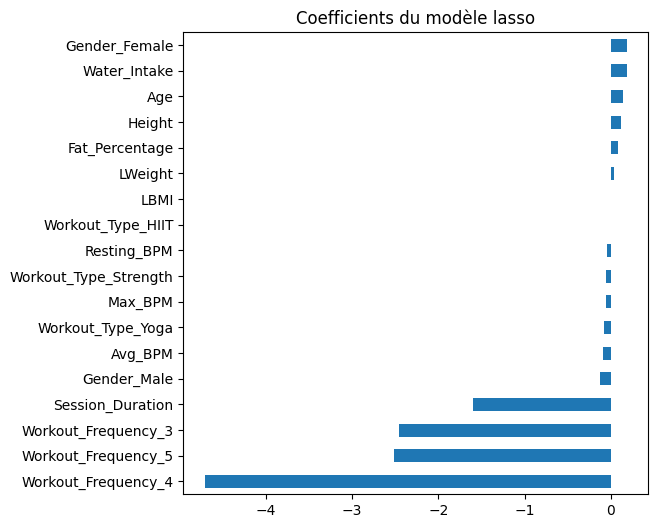

In [25]:
# Graphique de l'importance des variables
imp_coef = coef1.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

### 3.1.2 Classe 2

In [76]:
param=[{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit2 = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt2=logit2.fit(Xb2_train, Y2_train)
# paramètre optimal
logitOpt2.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt2.best_score_,logitOpt2.best_params_))

Meilleur score = 0.160678, Meilleur paramètre = {'C': 1}


In [77]:
# erreur sur l'échantillon test
1-logitOpt2.score(Xb2_test, Y2_test)

0.18461538461538463

In [78]:
# Prévision
y_chap2 = logitOpt2.predict(Xb2_test)
# matrice de confusion
table=pd.crosstab(y_chap2,Y2_test)
print(table)

accuracy = np.trace(table.values) / table.values.sum()
print("Accuracy:", accuracy)

Experience_Level_2  False  True 
row_0                           
False                  84     19
True                   17     75
Accuracy: 0.8153846153846154


In [79]:
logitLasso2=LogisticRegression(penalty="l1",C=logitOpt2.best_params_['C'],
                              solver="liblinear")
logitCoef2=logitLasso2.fit(Xb2_train,Y2_train).coef_
coef2 = pd.Series(logitCoef2[0], index = X2_train.columns)
print("Lasso conserve " + str(sum(coef2 != 0)) + 
      " variables et en supprime " +  str(sum(coef2 == 0)))

Lasso conserve 16 variables et en supprime 2


Text(0.5, 1.0, 'Coefficients du modèle lasso')

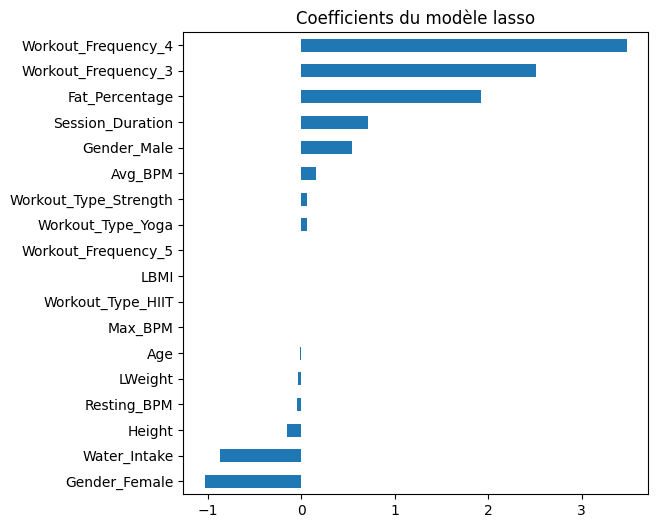

In [80]:
imp_coef2 = coef2.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef2.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

### 3.1.3 Classe 3

In [33]:
param=[{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit3 = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt3=logit3.fit(Xb3_train, Y3_train)
# paramètre optimal
logitOpt3.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt3.best_score_,logitOpt3.best_params_))

Meilleur score = 0.000000, Meilleur paramètre = {'C': 1}


In [34]:
# erreur sur l'échantillon test
1-logitOpt3.score(Xb3_test, Y3_test)

0.0

In [35]:
# Prévision
y_chap3 = logitOpt3.predict(Xb3_test)
# matrice de confusion
table=pd.crosstab(y_chap3,Y3_test)
print(table)

accuracy = np.trace(table.values) / table.values.sum()
print("Accuracy:", accuracy)

Experience_Level_3  False  True 
row_0                           
False                 167      0
True                    0     28
Accuracy: 1.0


In [37]:
# Coefficients
logitLasso3=LogisticRegression(penalty="l1",C=logitOpt3.best_params_['C'],
                              solver="liblinear")
logitCoef3=logitLasso3.fit(Xb3_train,Y3_train).coef_
coef3 = pd.Series(logitCoef3[0], index = X3_train.columns)
print("Lasso conserve " + str(sum(coef3 != 0)) + 
      " variables et en supprime " +  str(sum(coef3 == 0)))

Lasso conserve 6 variables et en supprime 12


Text(0.5, 1.0, 'Coefficients du modèle lasso')

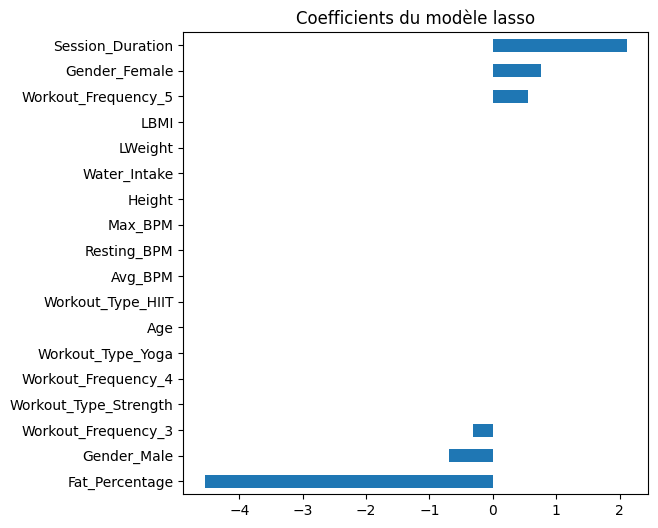

In [38]:
imp_coef3 = coef3.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef3.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

### 3.1.4 Comparaison de la prédiction des trois classes

/tmp/ipykernel_6338/2739305074.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


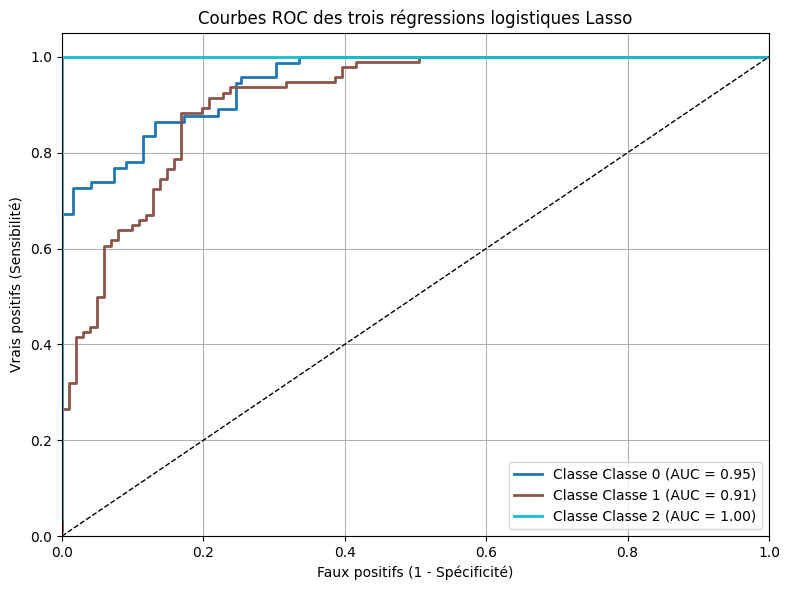

In [82]:
proba_1 = logitLasso1.predict_proba(Xb1_test)[:, 1]  # Score pour classe 0
proba_2 = logitLasso2.predict_proba(Xb2_test)[:, 1]  # Score pour classe 1
proba_3 = logitLasso3.predict_proba(Xb3_test)[:, 1]  # Score pour classe 2

# 2. Combiner en une seule matrice (n_samples, 3)
y_proba = np.vstack([proba_1, proba_2, proba_3]).T

# 3. Tracer les courbes ROC manuelles
plot_multiclass_roc_manual(
    y_true=Yb_test,
    y_proba=y_proba,
    class_names=["Classe 0", "Classe 1", "Classe 2"],
    title="Courbes ROC des trois régressions logistiques Lasso"
)

On remarque en regardant les courbes et en regardant l'AUC que la classe 2 a une prédiction parfaite. La classe 0 est un peu mieux prédite que la classe 1.

## 3.2 SVM

In [63]:
from sklearn.svm import SVC

SVC nous permet de faire de la prédiction multiclasse :

In [64]:
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4,2,2.5]}]
svm= GridSearchCV(SVC(probability=True),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xb_train, Yb_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.123377, Meilleur paramètre = {'C': 1.4}


#### Erreur sur l'échantillon de test

In [65]:
# prévision de l'échantillon test
y_pred_test_svm = svmOpt.predict(Xb_test)
y_proba_test_svm = svmOpt.predict_proba(Xb_test)
# matrice de confusion
table=pd.crosstab(y_pred_test_svm ,Yb_test)
print("Matrice de confusion: ")
print(table)

print("")
print("")

print("Rapport de classification: ")
print(classification_report(Yb_test, y_pred_test_svm))

accuracy_svm=accuracy_score(Yb_test, y_pred_test_svm)
erreur_precision_svm= 1- accuracy_svm
print(erreur_precision_svm)

Matrice de confusion: 
Experience_Level   1   2   3
row_0                       
1                 57   9   0
2                 16  85   0
3                  0   0  28


Rapport de classification: 
              precision    recall  f1-score   support

           1       0.86      0.78      0.82        73
           2       0.84      0.90      0.87        94
           3       1.00      1.00      1.00        28

    accuracy                           0.87       195
   macro avg       0.90      0.90      0.90       195
weighted avg       0.87      0.87      0.87       195

0.1282051282051282


/tmp/ipykernel_6338/2739305074.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


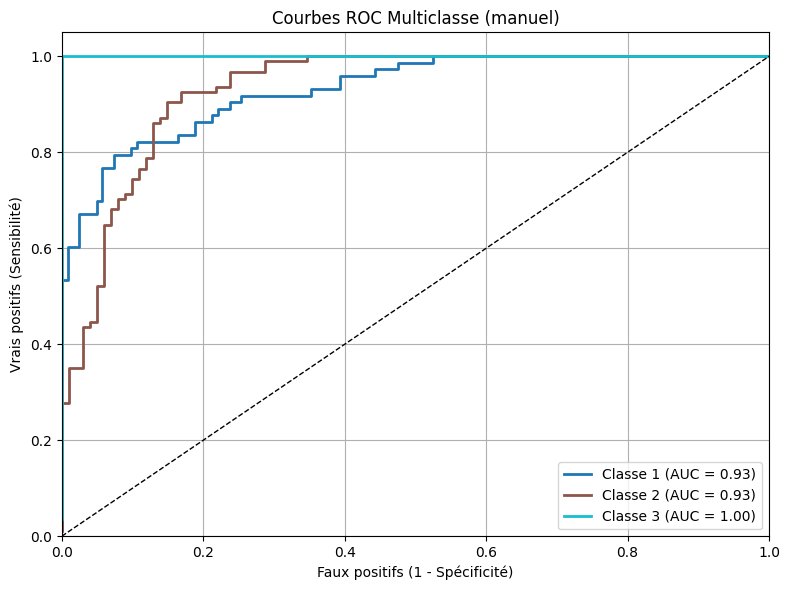

In [66]:
plot_multiclass_roc_manual(Yb_test,y_proba_test_svm, class_names=None)

## 3.3 Arbre optimal

In [58]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,12))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xb_train, Yb_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))


Meilleur score = 0.091292, Meilleur paramètre = {'max_depth': 4}


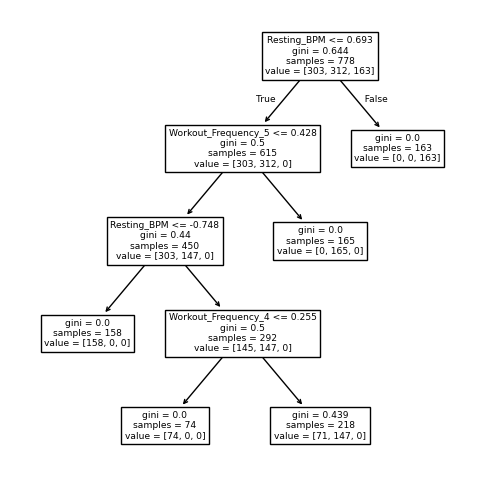

In [59]:
best_tree=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
best_tree.fit(Xb_train,Yb_train)
plot_tree(best_tree,feature_names=dfC.columns.tolist());
plt.show()

### Erreur de prevision sur l'échantillon de test : 

In [60]:
# prévision de l'échantillon test
y_pred_test_CART = treeOpt.predict(Xb_test)
y_proba_test_CART = treeOpt.predict_proba(Xb_test)

# matrice de confusion
print("Matrice de confusion CART : ")
table=pd.crosstab(y_pred_test_CART,Yb_test)
print((pd.DataFrame(table)))

print("")
print("")

print("Rapport de classification CART : ")
print(classification_report(Yb_test, y_pred_test_CART))

accuracy_CART=accuracy_score(Yb_test, y_pred_test_CART)
erreur_precision_CART= 1- accuracy_CART
print(erreur_precision_CART)

Matrice de confusion CART : 
Experience_Level   1   2   3
row_0                       
1                 50   0   0
2                 23  94   0
3                  0   0  28


Rapport de classification CART : 
              precision    recall  f1-score   support

           1       1.00      0.68      0.81        73
           2       0.80      1.00      0.89        94
           3       1.00      1.00      1.00        28

    accuracy                           0.88       195
   macro avg       0.93      0.89      0.90       195
weighted avg       0.91      0.88      0.88       195

0.11794871794871797


/tmp/ipykernel_6338/2739305074.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


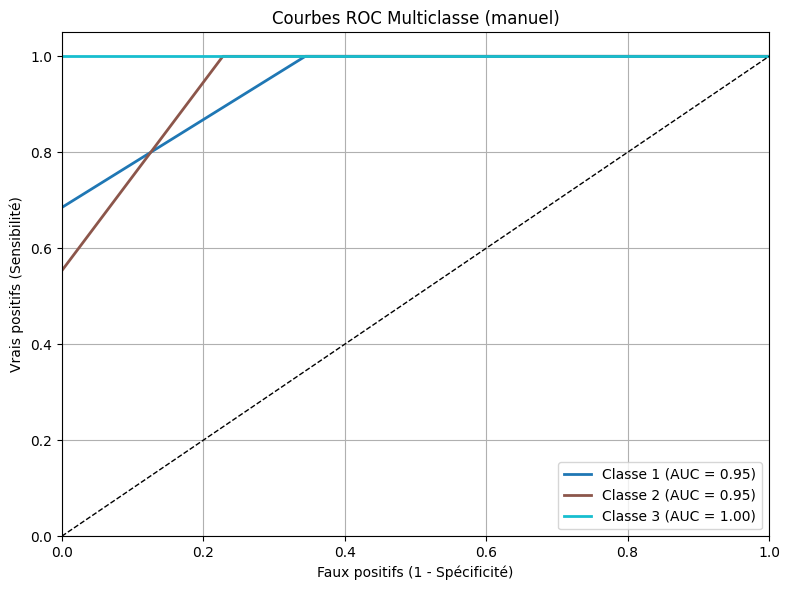

In [61]:
plot_multiclass_roc_manual(Yb_test,y_proba_test_CART, class_names=None)

## 3.4 Forêt Aléatoire

In [92]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xb_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.099007, Meilleur paramètre = {'max_features': 9}


#### Erreur de prévision sur le test

In [93]:
# prévision
y_pred_rf = rfOpt.predict(Xb_test)
y_proba_rf = rfOpt.predict_proba(Xb_test)
# matrice de confusion
print("Matrice de confusion: ")
table=pd.crosstab(y_pred_rf,Yb_test)
print(table)

print("")
print("")

print("Rapport de classification: ")
print(classification_report(Yb_test, y_pred_rf))

accuracy_rf=accuracy_score(Yb_test, y_pred_rf)
erreur_precision_rf= 1- accuracy_rf
print(erreur_precision_rf)

Matrice de confusion: 
Experience_Level   1   2   3
row_0                       
1                 53   9   0
2                 20  85   0
3                  0   0  28


Rapport de classification: 
              precision    recall  f1-score   support

           1       0.85      0.73      0.79        73
           2       0.81      0.90      0.85        94
           3       1.00      1.00      1.00        28

    accuracy                           0.85       195
   macro avg       0.89      0.88      0.88       195
weighted avg       0.85      0.85      0.85       195

0.14871794871794874


/tmp/ipykernel_6338/2739305074.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


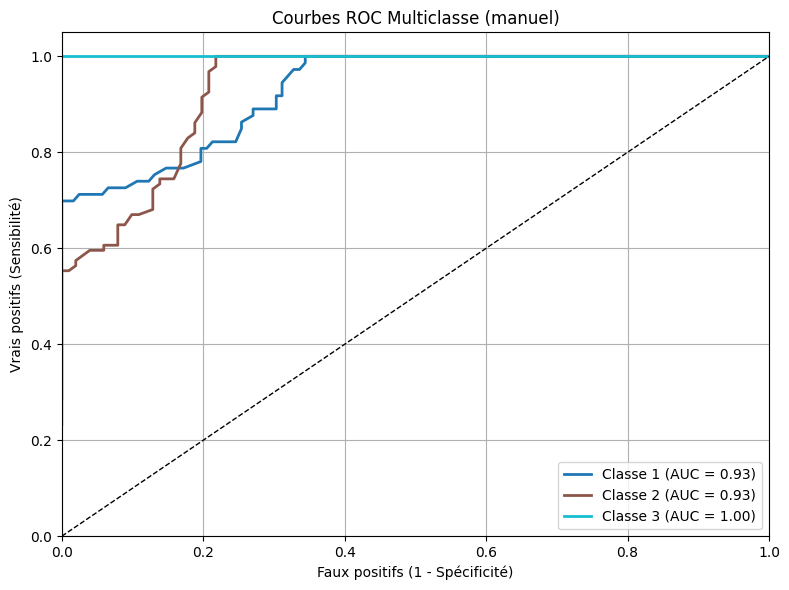

In [94]:
plot_multiclass_roc_manual(Yb_test,y_proba_rf, class_names=None)

## 3.5 Boosting

In [45]:
# Boosting multiclasse
param_grid = {
    'n_estimators': list(range(100, 301, 100)) 
}

gbm = GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10)
boost_model = gbm.fit(Xb_train, Yb_train)
# paramètre optimal
print("Meilleur taux = %f, Meilleur paramètre = %s" % (boost_model.best_score_,boost_model.best_params_))


# Prédictions
y_pred_boost = boost_model.predict(Xb_test)
y_proba_boost = boost_model.predict_proba(Xb_test)

# Matrice de confusion
print("Matrice de confusion :")
print(pd.crosstab(Yb_test, y_pred_boost))


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(Yb_test, y_pred_boost))
accuracy_boost=accuracy_score(Yb_test, y_pred_boost)
erreur_precision_boost= 1- accuracy_boost
print(erreur_precision_boost)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Meilleur taux = 0.891941, Meilleur paramètre = {'n_estimators': 100}
Matrice de confusion :
col_0              1   2   3
Experience_Level            
1                 52  21   0
2                  9  85   0
3                  0   0  28

Rapport de classification :
              precision    recall  f1-score   support

           1       0.85      0.71      0.78        73
           2       0.80      0.90      0.85        94
           3       1.00      1.00      1.00        28

    accuracy                           0.85       195
   macro avg       0.88      0.87      0.88       195
weighted avg       0.85      0.85      0.84       195

0.15384615384615385


/tmp/ipykernel_6338/2739305074.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


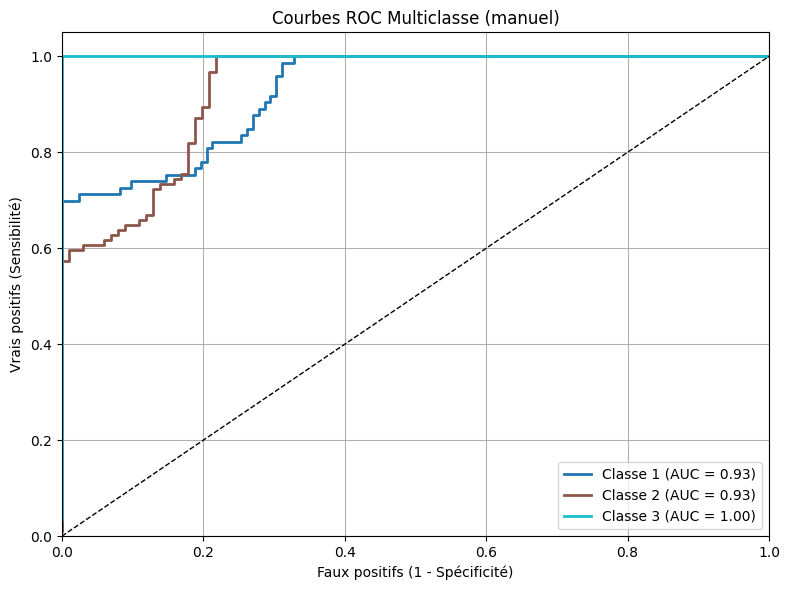

In [46]:
plot_multiclass_roc_manual(Yb_test, y_proba_boost, class_names=None)

## 3.6 Réseaux de neurones

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [89]:
mlp_clf = MLPClassifier(max_iter=10000, random_state=17)

param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'alpha': [1, 2, 3]
}

grid_clf = GridSearchCV(mlp_clf, param_grid, cv=5, n_jobs=-1)
grid_clf.fit(Xb_train, Yb_train)

best_model_clf = grid_clf.best_estimator_
best_params_clf = grid_clf.best_params_

In [90]:
y_pred_test_nn = best_model_clf.predict(Xb_test)
y_prob_test_nn = best_model_clf.predict_proba(Xb_test)
accuracy_nn = accuracy_score(Yb_test, y_pred_test_nn)
print("Meilleurs paramètres :", best_params_clf)
print("Accuracy sur test :", accuracy_nn)
print("Classification report :\n", classification_report(Yb_test, y_pred_test_nn))
erreur_precision_nn=1-accuracy_nn
print(erreur_precision_nn)

Meilleurs paramètres : {'alpha': 3, 'hidden_layer_sizes': (20,)}
Accuracy sur test : 0.8615384615384616
Classification report :
               precision    recall  f1-score   support

           1       0.85      0.77      0.81        73
           2       0.83      0.89      0.86        94
           3       1.00      1.00      1.00        28

    accuracy                           0.86       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.86      0.86      0.86       195

0.1384615384615384


/tmp/ipykernel_6338/2739305074.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


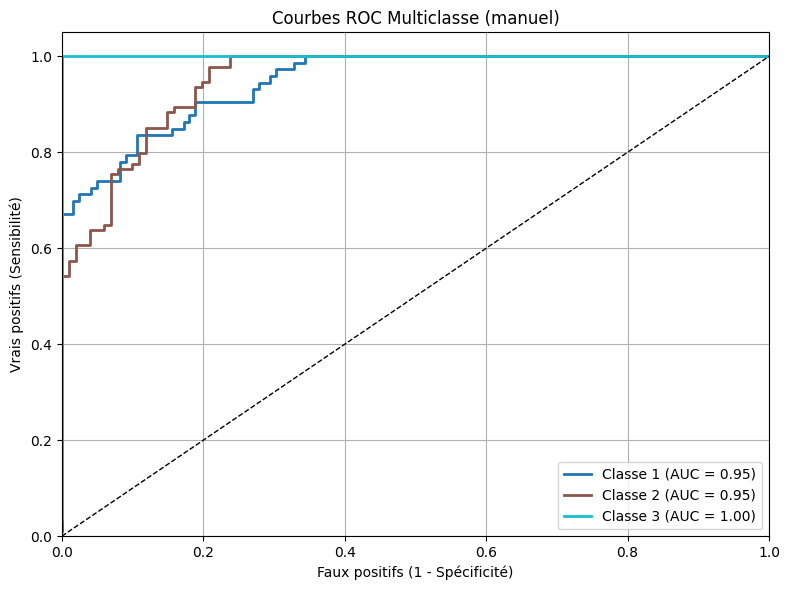

In [87]:
plot_multiclass_roc_manual(Yb_test,y_prob_test_nn, class_names=None)

## 3.7 Comparaison des differents modèles 

In [95]:
print("erreur de precision RdN :",erreur_precision_nn,"\n")
print("erreur de precision Boosting :",erreur_precision_boost,"\n")
print("erreur de precision Foret aléatoire :" ,erreur_precision_rf,"\n")
print("erreur de precision Arbre optimal CART :",erreur_precision_CART,"\n")
print("erreur de precision SVC :",erreur_precision_svm , "\n")

erreur de precision RdN : 0.1384615384615384 

erreur de precision Boosting : 0.15384615384615385 

erreur de precision Foret aléatoire : 0.14871794871794874 

erreur de precision Arbre optimal CART : 0.11794871794871797 

erreur de precision SVC : 0.1282051282051282 



On remarque que l'arbre CART a les meilleures performances. C'est un résultat étrange, surtout comparé à Boosting et la Random Forest qui sont censés être des versions corrigées du CART. Rajouter une contrainte d'interprétabilité ne change pas la conclusion vu que CART est un modèle interprétable.

On remarque de plus que les résultats sont assez différents de notre notebook R. Cela peut s'expliquer par l'instabilité de CART, qui est fortement dépendant des données qu'il utilise pour s'entraîner. Ses sorties peuvent fortement varier. 

Pour conclure sur ce notebook, on a pu tester différentes méthodes vues en cours pour de la régression et classification. Au travers de validations croisées, on a pu calibrer les hyperparamètres de chaque modèle pour essayer d'en tirer les meilleures performances possibles. On obtient des resultats satisfaisants, avec des RMSE et erreurs de précision faibles. On a pu confirmer les tendances entrevues en analyse descriptive des données, tout en produisant des prédictions fiables.  